In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [142]:
old_allegations = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-merged-2015/Master Database 12-7-15 vF_allegations.csv')

In [143]:
old_officers = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-merged-2015/Master Database 12-7-15 vF_officers.csv')

In [144]:
new_accused = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-cpd-2016-nov/accused2.csv')
new_complainants = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-cpd-2016-nov/complainants.csv')
new_complaints = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-cpd-2016-nov/complaints.csv')
new_investigator = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-cpd-2016-nov/investigator.csv')
new_victims = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-cpd-2016-nov/victims.csv')
new_witness = pd.read_csv('/Users/annytruong/chicago-police-data/complaints-cpd-2016-nov/witness.csv')

In [145]:
old_allegations.sample(10)

,id,crid,officer_id,cat_id,category,allegation_name,recc_finding,recc_outcome,final_finding,final_outcome,...,location,add1,add2,city,incident_date,start_date,end_date,investigator_id,final_outcome_class,Unnamed: 24
37500,37500.0,1.06478e+06,4490.0,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,NaN,600.0,NaN,600.0,...,19,NaN,NaN,NaN,2013-09-09 10:45,2013-09-09,2013-10-22,1443.0,not-sustained,NaN
15855,15855.0,286737,6480.0,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,NaN,NaN,UN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained,NaN
9919,9919.0,1009800,2211.0,09J,Conduct Unbecoming (Off-duty),Association With Felon,NaN,NaN,EX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained,NaN
22268,22268.0,300348,32.0,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,NaN,NaN,UN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained,NaN
15972,15972.0,299694,5233.0,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,NaN,NaN,UN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained,NaN
7208,7208.0,281032,1008.0,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,NaN,NaN,UN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained,NaN
6069,6070.0,1005753,618.0,10P,Operation/Personnel Violations,Misuse Of Department Equipment / Supplies,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN
50820,50820.0,1.05511e+06,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,XX,NaN,NaN,CHICAGO IL,2012-06-27 00:00,2012-06-27,2012-07-26,1254.0,unknown,NaN
28650,28650.0,1070713,382.0,10Z,Operation/Personnel Violations,Miscellaneous,NaN,600.0,NaN,600.0,...,17,4101.0,S RICHMOND ST,CHICAGO IL 60632,2014-08-01 00:00,2014-08-01,2014-11-04,417.0,not-sustained,NaN
31315,31315.0,1046014,1565.0,03D,First Amendment and Illegal Arrest,Illegal Arrest / False Arrest,UN,600.0,UN,600.0,...,19,NaN,NaN,NaN,2011-06-08 00:00,2011-06-09,2014-09-30,1149.0,not-sustained,NaN


In [146]:
old_allegations.describe()

,id,officer_id,recc_outcome,final_outcome,beat,add1,investigator_id,Unnamed: 24
count,56384.000000,48314.000000,16551.000000,28144.000000,27731.000000,21125.000000,27951.000000,0.0
mean,28192.500000,4468.149646,573.858558,561.538481,1093.422560,4472.807385,760.112805,NaN
std,16276.803126,2584.671485,117.996130,147.916487,724.012928,3055.705575,442.666598,NaN
min,1.000000,1.000000,0.000000,0.000000,111.000000,100.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,56384.000000,8924.000000,800.000000,999.000000,4100.000000,22829.000000,1510.000000,NaN


In [147]:
old_allegations = old_allegations.drop(['Unnamed: 24'], axis=1)

In [148]:
old_officers.sample()

,officer_id,officer_name,officer_first,officer_last,gender,race,race_edit,appt_date,star,rank,...,Active (June 1 2015),allegations_count,discipline_count,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
1394,1395.0,"COCHRAN, DANYELLE",DANYELLE,COCHRAN,F,BLK,Black,2011-10-17,14369.0,PO,...,Unknown,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
old_officers.describe()

,officer_id,star,unit,birth_year,allegations_count,discipline_count,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
count,9704.000000,8683.000000,8042.000000,6872.000000,9704.000000,9704.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4852.850680,10981.767246,109.855633,1969.813591,4.978772,0.186212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2801.842267,6135.551822,180.207411,10.022375,6.420938,0.598231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,3.000000,1.000000,1916.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9705.000000,60051.000000,712.000000,1992.000000,68.000000,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
old_officers = old_officers.drop(['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], 1)

In [151]:
old_officers.sample()

,officer_id,officer_name,officer_first,officer_last,gender,race,race_edit,appt_date,star,rank,unit,birth_year,Active (June 1 2015),allegations_count,discipline_count
1380,1381.0,"CLINKSCALES, PHYLLIS",PHYLLIS,CLINKSCALES,F,BLK,Black,1991-05-22,NaN,PO,5.0,1951.0,Unknown,3.0,0.0


In [152]:
new_accused.sample()

,Unnamed: 0,Complaint_Number,Name,Birth_Yr,Gender,Race_Code,Date_of_Appt,Current_Unit,Current_Rank,Star,Complaint_Category,Finding,Recommended_Discipline,Final_Finding,Discipline
121887,26561,1076365,"HABIAK, PAUL",1979.0,M,WHI,2002-04-29,8,PO,14939.0,05Q-CIVIL SUIT - THIRD PARTY,NaN,600.0,NaN,600.0


In [153]:
new_accused = new_accused.drop(['Unnamed: 0'],1)

In [154]:
new_investigator.columns

Index([u'Unnamed: 0', u'crid', u'full.name', u'unit', u'rank', u'star',
       u'appointed.d-b-Y'],
      dtype='object')

In [155]:
new_investigator = new_investigator.drop(['Unnamed: 0'], 1)

In [156]:
new_complainants.sample()

,crid,gender,age,race
11231,1014582,M,41.0,BLACK


In [157]:
new_complaints.sample()

,Unnamed: 0,crid,beat,location.code,address.number,address.street,address.cs,incident.datetime,complaint.d-b-Y,closed.d-b-Y
109034,109035,1035164,0,XX,NaN,NaN,CHICAGO IL,05-Apr-2010 0:00,05 Apr 2010,18-Oct-2010


In [158]:
new_complaints = new_complaints.drop(['Unnamed: 0'],1)

In [159]:
new_victims.sample()

,Unnamed: 0,crid,gender,age,race
10148,10149,1042282,M,NaN,BLACK


In [160]:
new_victims = new_victims.drop(['Unnamed: 0'], 1)

In [161]:
new_witness.sample()

,Unnamed: 0,full.name,gender,race,star,birth.year,appointed.d-b-Y,crid
591,592,"CHAPIN, MARY",F,WHI,7909,1976.0,21-Jun-99,289549


In [162]:
new_witness = new_witness.drop(['Unnamed: 0'], 1)

In [163]:
old_officers

,officer_id,officer_name,officer_first,officer_last,gender,race,race_edit,appt_date,star,rank,unit,birth_year,Active (June 1 2015),allegations_count,discipline_count
0,1.0,"AARON, JEFFERY",JEFFERY,AARON,M,WHI,White,2005-09-26,13001.0,PO,14.0,1971.0,Yes,2.0,0.0
1,2.0,"AARON, KARINA",KARINA,AARON,F,S,Hispanic,2005-09-26,13705.0,PO,15.0,1980.0,Yes,3.0,0.0
2,3.0,"ABDELHADI, ABDALMAHD",ABDALMAHD,ABDELHADI,M,WHI,White,2006-12-18,7147.0,PO,191.0,1978.0,Yes,1.0,0.0
3,4.0,"ABDELMAJEID, AZIZ",AZIZ,ABDELMAJEID,M,API,Asian,2008-04-28,14008.0,PO,3.0,1984.0,Yes,6.0,0.0
4,5.0,"ABDULLAH, MOULAY",MOULAY,ABDULLAH,NaN,NaN,Unknown,NaN,4527.0,NaN,166.0,NaN,Unknown,21.0,0.0
5,6.0,"ABRAHAM, NANCY",NANCY,ABRAHAM,F,API,Asian,2014-04-28,16579.0,PO,413.0,1986.0,Yes,1.0,0.0
6,7.0,"ABRAMS, HENRY",HENRY,ABRAMS,M,BLK,Black,1986-06-16,11485.0,PO,50.0,1963.0,Yes,1.0,0.0
7,8.0,"ABRON, FLOYD",FLOYD,ABRON,M,BLK,Black,1998-06-29,12861.0,PO,11.0,1973.0,Yes,8.0,1.0
8,9.0,"ABUZANAT, ABDALLA",ABDALLA,ABUZANAT,NaN,NaN,Unknown,NaN,15206.0,NaN,NaN,NaN,Unknown,7.0,1.0
9,10.0,"ACCARDO, JENNIFER",JENNIFER,ACCARDO,F,WHI,White,2004-11-29,9248.0,PO,24.0,1979.0,Yes,2.0,0.0


In [164]:
old_officers['rank'].unique()

array(['PO', nan, 'SGT', 'DET', 'FTO', 'LT', 'CMDR', 'ET', 'Cpt', 'Chief',
       'Agent'], dtype=object)

In [165]:
new_investigator.sample()

,crid,full.name,unit,rank,star,appointed.d-b-Y
107665,1071358,"MOSQUERA, JOHN",9.0,SERGEANT OF POLICE,1959.0,30-Jul-90


In [166]:
old_allegations.sample(10)

,id,crid,officer_id,cat_id,category,allegation_name,recc_finding,recc_outcome,final_finding,final_outcome,...,beat,location,add1,add2,city,incident_date,start_date,end_date,investigator_id,final_outcome_class
2837,2838.0,283527,1805.0,05L,Arrest/Lock-up Procedures,Domestic Incident - Not Physical,NaN,NaN,NS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained
23245,23245.0,1000136,6769.0,10V,Operation/Personnel Violations,Inventory Procedures,NaN,NaN,UN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained
34132,34132.0,1.06242e+06,2854.0,04E,Search-Related,Prisoners Property,NaN,600.0,NaN,600.0,...,1533.0,17,4945.0,W QUINCY ST,CHICAGO IL,2013-05-17 00:01,2013-05-22,2013-06-25,329.0,not-sustained
27662,27662.0,281923,8628.0,NaN,Unknown,Unknown,NaN,NaN,UN,600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2002-06-28,2003-04-04,NaN,not-sustained
17830,17830.0,1017443,4454.0,02E,Alcohol Abuse,Possession / Drinking Alcohol - On Duty,NaN,NaN,NS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained
41780,41780.0,1.05867e+06,6456.0,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,NaN,600.0,NaN,600.0,...,1731.0,19,NaN,NaN,NaN,2012-11-20 00:00,2012-11-28,2013-02-08,1479.0,not-sustained
19032,19032.0,292107,8748.0,05P,Arrest/Lock-up Procedures,Unnecessary Display Of Weapon / On Duty,NaN,NaN,UN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not-sustained
52358,52358.0,1.06155e+06,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,935.0,17,5311.0,S SHIELDS AVE,CHICAGO IL 60609,2013-04-17 11:40,2013-04-17,2013-09-17,1137.0,unknown
36944,36944.0,1.07125e+06,4226.0,03D,First Amendment and Illegal Arrest,Illegal Arrest / False Arrest,NaN,600.0,NaN,600.0,...,122.0,17,200.0,S WELLS ST,CHICAGO IL,2014-08-26 20:00,2014-08-28,2015-03-06,1174.0,not-sustained
52492,52492.0,1.06208e+06,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,312.0,17,6348.0,S LANGLEY AVE,CHICAGO IL 60637,2013-05-09 00:01,2013-05-09,2013-08-15,695.0,unknown


In [167]:
new_accused.Complaint_Number = new_accused.Complaint_Number.apply(lambda x: str(x))

In [206]:
old_allegations=old_allegations[old_allegations.crid!='2981J3']

In [207]:
old_allegations=old_allegations[old_allegations.crid!='311848.']

In [235]:
old_allegations = old_allegations.sort('crid')

/Users/annytruong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [237]:
old_allegations = old_allegations[:-1]

In [238]:
old_allegations.crid = old_allegations.crid.apply(lambda x: int(x))
old_allegations.crid = old_allegations.crid.apply(lambda x: str(x))

/Users/annytruong/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [239]:
old_allegations.crid.unique()

array(['1074', '107332', '107357', ..., '605996', '91006219', '924945'], dtype=object)

In [240]:
old_allegations

,id,crid,officer_id,cat_id,category,allegation_name,recc_finding,recc_outcome,final_finding,final_outcome,...,beat,location,add1,add2,city,incident_date,start_date,end_date,investigator_id,final_outcome_class
54839,54839.0,1074,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,533.0,19,NaN,NaN,NaN,2015-02-28 23:32,2015-03-02,NaN,NaN,open-investigation
42531,42531.0,107332,6840.0,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,423.0,17,8529.0,S EXCHANGE AVE,CHICAGO IL 60617,2014-12-29 03:00,2015-01-15,NaN,NaN,open-investigation
54840,54840.0,107357,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,734.0,17,6900.0,S LOOMIS BLVD,CHICAGO IL 60636,2015-01-11 19:00,2015-01-14,NaN,NaN,open-investigation
55651,55651.0,107627,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,921.0,17,2800.0,W POPE JOHN PAUL II DR,CHICAGO IL 60632,2015-07-21 20:00,2015-07-22,NaN,NaN,open-investigation
55652,55652.0,174609,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,424.0,17,8300.0,S COMMERCIAL AVE,CHICAGO IL 60617,2015-04-09 19:00,2015-04-09,NaN,NaN,open-investigation
55653,55653.0,176127,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,1024.0,04,3315.0,W OGDEN AVE,CHICAGO IL,2015-07-13 17:00,2015-07-13,NaN,NaN,open-investigation
38802,38802.0,1038595,5121.0,05D,Arrest/Lock-up Procedures,Excessive Force / Off Duty - No Injury,EX,600.0,EX,600.0,...,411.0,17,7900.0,S SOUTH CHICAGO AVE,CHICAGO IL 60617,2013-08-04 01:12,2013-08-04,2014-07-09,291.0,not-sustained
46357,46357.0,1038595,8536.0,05D,Arrest/Lock-up Procedures,Excessive Force / Off Duty - No Injury,EX,600.0,EX,600.0,...,411.0,17,7900.0,S SOUTH CHICAGO AVE,CHICAGO IL 60617,2013-08-04 01:12,2013-08-04,2014-07-09,291.0,not-sustained
46993,46993.0,1039179,8810.0,05J,Arrest/Lock-up Procedures,"U Converted To C.R. (Records Keeping Only, Ini...",NaN,NaN,SU,0.0,...,2223.0,17,9100.0,S HALSTED ST,CHICAGO IL,2012-08-23 00:00,2012-08-23,2014-04-21,645.0,sustained
48313,48313.0,1043921,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,424.0,17,8626.0,S BALTIMORE AVE,CHICAGO IL,2011-03-13 12:19,2011-03-13,2011-04-28,361.0,unknown


In [241]:
old_allegations_subset = old_allegations[['crid', 'cat_id', 'category', 'allegation_name']]

In [242]:
new_accused.head()

,Complaint_Number,Name,Birth_Yr,Gender,Race_Code,Date_of_Appt,Current_Unit,Current_Rank,Star,Complaint_Category,Finding,Recommended_Discipline,Final_Finding,Discipline
0,258996,"BARRON, WILLIAM",1949.0,M,WHI,1978-02-27,018,SGT,NaN,01A-USE OF PROFANITY,NS,600.0,NS,600.0
1,258997,"C0NNOLLY, KIMBERLY",1965.0,F,BLK,1990-07-30,055,NaN,11026.0,01A-USE OF PROFANITY,UN,600.0,UN,600.0
2,258997,"KEENE, JOHN",1968.0,M,WHI,1999-03-08,153,PO,NaN,01A-USE OF PROFANITY,UN,600.0,UN,600.0
3,258998,"SLAVIN, SCOTT",1965.0,M,WHI,1991-11-18,145,SGT,807.0,10J-NEGLECT OF DUTY/CONDUCT UNBECOMING - ON DUTY,EX,600.0,EX,600.0
4,259001,"MARTINEZ, ANTONIO",1971.0,M,S,1996-11-04,701,PO,NaN,10U-INADEQUATE/FAILURE TO PROVIDE SERVICE,UN,600.0,UN,600.0


In [243]:
new_accused['complaint_cat_id'] = new_accused.Complaint_Category.str[:3]

In [247]:
new_accused['complaint_name'] = new_accused.Complaint_Category.str[4:]

In [248]:
new_accused.sample(5)

,Complaint_Number,Name,Birth_Yr,Gender,Race_Code,Date_of_Appt,Current_Unit,Current_Rank,Star,Complaint_Category,Finding,Recommended_Discipline,Final_Finding,Discipline,complaint_cat_id,complaint_name
50265,302249,"GUERRERO, ALEX",1970.0,M,S,1996-11-04,701.0,PO,NaN,05K-DOMESTIC ALTERCATION/INCIDENT - OFF DUTY,UN,600.0,UN,600.0,05K,DOMESTIC ALTERCATION/INCIDENT - OFF DUTY
99789,1044863,"PRADO, ROCIO",1973.0,F,S,2006-09-25,125,PO,9065.0,03C-SEARCH OF PREMISE/VEHICLE WITHOUT WARRANT,NaN,600.0,NaN,600.0,03C,SEARCH OF PREMISE/VEHICLE WITHOUT WARRANT
29300,284085,"PRICE, ALMA",1970.0,F,BLK,1999-06-21,003,PO,7552.0,01A-USE OF PROFANITY,UN,600.0,NS,600.0,01A,USE OF PROFANITY
83115,1023488,"ENRIQUEZ JR, DOMINGO",1976.0,M,S,2001-05-29,193,PO,12794.0,03G-MISCELLANEOUS,NaN,600.0,NaN,600.0,03G,MISCELLANEOUS
2830,261540,"O GRADY, JAMES",1964.0,M,WHI,1986-07-14,011,CMDR,NaN,01A-USE OF PROFANITY,NS,600.0,NS,600.0,01A,USE OF PROFANITY


In [249]:
new_accused_subset = new_accused[['Complaint_Number', 'complaint_cat_id', 'complaint_name']]

In [250]:
new_accused_subset

,Complaint_Number,complaint_cat_id,complaint_name
0,258996,01A,USE OF PROFANITY
1,258997,01A,USE OF PROFANITY
2,258997,01A,USE OF PROFANITY
3,258998,10J,NEGLECT OF DUTY/CONDUCT UNBECOMING - ON DUTY
4,259001,10U,INADEQUATE/FAILURE TO PROVIDE SERVICE
5,259001,10U,INADEQUATE/FAILURE TO PROVIDE SERVICE
6,259002,05A,ARRESTEE - DURING ARREST
7,259002,05A,ARRESTEE - DURING ARREST
8,259005,07A,MISCONDUCT DURING ISSUANCE OF CITATION
9,259008,09G,ABUSE OF AUTHORITY


In [253]:
merged = old_allegations_subset.merge(new_accused_subset, left_on='crid', right_on='Complaint_Number')

In [254]:
merged

,crid,cat_id,category,allegation_name,Complaint_Number,complaint_cat_id,complaint_name
0,1038595,05D,Arrest/Lock-up Procedures,Excessive Force / Off Duty - No Injury,1038595,05D,NO ARREST
1,1038595,05D,Arrest/Lock-up Procedures,Excessive Force / Off Duty - No Injury,1038595,05D,NO ARREST
2,1038595,05D,Arrest/Lock-up Procedures,Excessive Force / Off Duty - No Injury,1038595,05D,NO ARREST
3,1038595,05D,Arrest/Lock-up Procedures,Excessive Force / Off Duty - No Injury,1038595,05D,NO ARREST
4,1039179,05J,Arrest/Lock-up Procedures,"U Converted To C.R. (Records Keeping Only, Ini...",1039179,05J,"""U"" CONVERTED TO C.R. (RECORDS KEEPING ONLY, I..."
5,1039179,05J,Arrest/Lock-up Procedures,"U Converted To C.R. (Records Keeping Only, Ini...",1039179,05J,"""U"" CONVERTED TO C.R. (RECORDS KEEPING ONLY, I..."
6,1039179,05J,Arrest/Lock-up Procedures,"U Converted To C.R. (Records Keeping Only, Ini...",1039179,05J,"""U"" CONVERTED TO C.R. (RECORDS KEEPING ONLY, I..."
7,1039179,05J,Arrest/Lock-up Procedures,"U Converted To C.R. (Records Keeping Only, Ini...",1039179,05J,"""U"" CONVERTED TO C.R. (RECORDS KEEPING ONLY, I..."
8,1043926,10Z,Operation/Personnel Violations,Miscellaneous,1043926,10Z,MISCELLANEOUS
9,1043926,10Z,Operation/Personnel Violations,Miscellaneous,1043926,10Z,MISCELLANEOUS


In [255]:
merged['match'] = (merged.cat_id == merged.complaint_cat_id)

In [258]:
changed_cat = merged[merged.match == False]

In [259]:
changed_cat

,crid,cat_id,category,allegation_name,Complaint_Number,complaint_cat_id,complaint_name,match
153,1043965,09A,Conduct Unbecoming (Off-duty),Altercation / Disturbance - Other,1043965,01A,USE OF PROFANITY,False
155,1043965,09A,Conduct Unbecoming (Off-duty),Altercation / Disturbance - Other,1043965,10Z,MISCELLANEOUS,False
156,1043965,10Z,Operation/Personnel Violations,Miscellaneous,1043965,01A,USE OF PROFANITY,False
157,1043965,10Z,Operation/Personnel Violations,Miscellaneous,1043965,09A,ALTERCATION/DISTURBANCE - DOMESTIC,False
160,1043965,01A,Verbal Abuse,Use Of Profanity,1043965,09A,ALTERCATION/DISTURBANCE - DOMESTIC,False
161,1043965,01A,Verbal Abuse,Use Of Profanity,1043965,10Z,MISCELLANEOUS,False
375,1044150,10B,Operation/Personnel Violations,Seat Belts,1044150,12A,"PROPER ACTION, INITIATE",False
378,1044150,12A,Supervisory Responsibilities,Initiate Proper Action,1044150,10B,MEDICAL ROLL,False
692,1044492,NaN,Unknown,Unknown,1044492,NaN,NaN,False
707,1044510,05N,Arrest/Lock-up Procedures,Unnecessary Physical Contact / Off Duty - No I...,1044510,10J,NEGLECT OF DUTY/CONDUCT UNBECOMING - ON DUTY,False


In [273]:
changed_cat.crid.count()

27202

In [283]:
changed_cat1 = changed_cat.groupby(['cat_id','allegation_name']).count()

In [284]:
changed_cat1

,,crid,category,Complaint_Number,complaint_cat_id,complaint_name,match
cat_id,allegation_name,,,,,,
01A,Use Of Profanity,252,252,252,239,239,252
01B,"Racial / Ethnic, Etc.",47,47,47,47,47,47
01C,Sexual Orientation,61,61,61,61,61,61
02A,Intoxicated On Duty,2,2,2,2,2,2
02B,Intoxicated Off Duty,8,8,8,8,8,8
02D,D.U.I. - Off Duty,5,5,5,5,5,5
02G,Miscellaneous,13,13,13,13,13,13
03A,First Amendment,25,25,25,25,25,25
03B,Improper Search Of Person,371,371,371,369,369,371


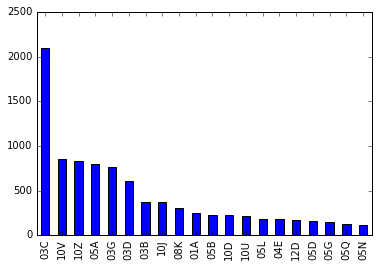

In [275]:
changed_cat.cat_id.value_counts()[:20].plot(kind='bar')

In [277]:
changed_cat2 = changed_cat[changed_cat.cat_id =='03C']

In [278]:
changed_cat2

,crid,cat_id,category,allegation_name,Complaint_Number,complaint_cat_id,complaint_name,match
2850,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2860,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2870,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2880,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2890,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2910,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2920,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2930,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
2940,1045866,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1045866,NaN,NaN,False
3107,1046010,03C,First Amendment and Illegal Arrest,Search Of Premise Without Warrant,1046010,05L,UNNECESSARY PHYSICAL CONTACT - ON DUTY,False


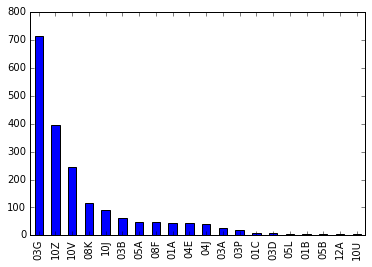

In [280]:
changed_cat2.complaint_cat_id.value_counts()[:20].plot(kind='bar')

In [282]:
changed_cat2.groupby(['complaint_cat_id','complaint_name']).count()

,,crid,cat_id,category,allegation_name,Complaint_Number,match
complaint_cat_id,complaint_name,,,,,,
01A,USE OF PROFANITY,44,44,44,44,44,44
01B,"RACIAL/ETHNIC, ETC.",6,6,6,6,6,6
01C,MISCELLANEOUS,9,9,9,9,9,9
03A,FIRST AMENDMENT,25,25,25,25,25,25
03B,SEARCH OF PERSON WITHOUT WARRANT,61,61,61,61,61,61
03D,ILLEGAL ARREST,8,8,8,8,8,8
03G,MISCELLANEOUS,715,715,715,715,715,715
03P,RACIAL PROFILING (ADVOCATE USE ON CLOSING ONLY),20,20,20,20,20,20
04D,"SEARCH, PERSON/PROPERTY",4,4,4,4,4,4
